## Run Other Notebook

In [1]:
%run "Environment.ipynb"
%run "Trend Predictor.ipynb"

Using TensorFlow backend.


## Import Package

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

## System

In [3]:
class System():
    
    def __init__(self):
        
        self.env = Environment()
        
        self.tp = TrendPredictor()
        
        self.episode_reward = []
        self.ans_record = []
        self.action_record = []
        
        
    def train(self):
        
        state = self.env.reset()
        done = False
        epi_rd = 0
        epi_idx = 0
        daily_idx = 0
        
        while done == False:
            
            state = np.reshape(state, (1, 20, 1))
            action = self.tp.sample_action(state)
            state = np.reshape(state, (20))
            new_state, daily_reward, done = self.env.step(action)
            self.tp.store_experience(state, action, new_state, daily_reward, int(done))
            
            self.action_record.append(action)
            
            state = new_state
            epi_rd += daily_reward
            
            
            
            daily_idx += 1
            if daily_idx % 1 == 0:
                self.episode_reward.append(epi_rd)
                epi_idx += 1
                print("#%.4d Episode: %.3d" %(epi_idx+1, epi_rd))
                epi_rd = 0
                self.tp.train_update_nn()
            
            if epi_idx % 5 == 0:
                self.tp.train_target_nn()

## Main

In [4]:
system = System()
system.train()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 52,579
Trainable params: 52,579
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                

#0090 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.9144
#0091 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.5767
#0092 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 4.5486
#0093 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.7721
#0094 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3223
#0095 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.3512
#0096 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.1730
#0097 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3631
#0098 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3524
#0099 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.7169
#0100 E

#0173 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.0145
#0174 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.4653
#0175 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.8645
#0176 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.2401
#0177 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.9652
#0178 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.5487
#0179 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6960
#0180 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8178
#0181 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.4438
#0182 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3404
#0

Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.4893
#0256 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.0786
#0257 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.5561
#0258 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 4.4135
#0259 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.3014
#0260 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.4107
#0261 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 4.1388
#0262 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.0267
#0263 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.0343
#0264 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.8633
#0265 Episode: -001
Ep

#0338 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.1494
#0339 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3841
#0340 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.4102
#0341 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.0992
#0342 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.7444
#0343 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.6173
#0344 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.1079
#0345 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.6266
#0346 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.6476
#0347 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.0312
#

#0421 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.7373
#0422 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.1249
#0423 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.2460
#0424 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.7422
#0425 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8056
#0426 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.2982
#0427 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.5357
#0428 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3381
#0429 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.6528
#0430 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8131
#

Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6784
#0504 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.1229
#0505 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.1717
#0506 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.1238
#0507 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.0555
#0508 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8568
#0509 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.2321
#0510 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.5041
#0511 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.7960
#0512 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.4345
#0513 Episode: 001
Epoch 1

#0586 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3793
#0587 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.2061
#0588 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.4471
#0589 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.1425
#0590 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.4771
#0591 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3430
#0592 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.7077
#0593 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.0042
#0594 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3864
#0595 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3019
#0

#0669 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.5337
#0670 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.5215
#0671 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.0714
#0672 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.2477
#0673 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.1934
#0674 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.1438
#0675 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.9990
#0676 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.0612
#0677 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.1868
#0678 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6046
#06

#0752 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.4810
#0753 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 0.4524
#0754 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6456
#0755 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.7778
#0756 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.7422
#0757 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.4432
#0758 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3532
#0759 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.7525
#0760 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.2348
#0761 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.3541
#0762 E

Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.4361
#0835 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.7262
#0836 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6856
#0837 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.8289
#0838 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6608
#0839 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.4077
#0840 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.0174
#0841 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.2324
#0842 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.8389
#0843 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8087
#0844 Episode: -005


#0917 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.6574
#0918 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.2949
#0919 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.7738
#0920 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.4106
#0921 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.2240
#0922 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.7210
#0923 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.8308
#0924 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.1716
#0925 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.2740
#0926 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3452


Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.3246
#1000 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 957us/step - loss: 3.8511
#1001 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.8393
#1002 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.7680
#1003 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.5234
#1004 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.2881
#1005 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.3840
#1006 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.7172
#1007 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.3089
#1008 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.6502
#1009 Episode: -001


#1082 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.3339
#1083 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.1637
#1084 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6196
#1085 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8292
#1086 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.0973
#1087 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.2726
#1088 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 4.2019
#1089 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.7111
#1090 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.3499
#1091 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3366
#

Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.2444
#1165 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 4.2040
#1166 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.5770
#1167 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 4.4456
#1168 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 3.6451
#1169 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.9015
#1170 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.6490
#1171 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.8190
#1172 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.6078
#1173 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.2762
#1174 Episode: -001
E

Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.2345
#1247 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.5354
#1248 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 0.8394
#1249 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.9507
#1250 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 3.1013
#1251 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.2732
#1252 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 3.3815
#1253 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.8078
#1254 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 1.8896
#1255 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6577
#1256 Episode: -001
E

#1329 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.8249
#1330 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.4932
#1331 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.6116
#1332 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.6982
#1333 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3536
#1334 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.6526
#1335 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.4793
#1336 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.8774
#1337 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.0145
#1338 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 4.2416
#

Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3083
#1412 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.1130
#1413 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.9424
#1414 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.1452
#1415 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.6441
#1416 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 1.4256
#1417 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.6405
#1418 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.4245
#1419 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.8622
#1420 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.0252
#1421 Episode: 001
Epoch

#1494 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.3292
#1495 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.0712
#1496 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.4242
#1497 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.4613
#1498 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.2724
#1499 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.3157
#1500 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8115
#1501 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 3.7375
#1502 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.6086
#1503 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.3156
#1504 Epi

#1577 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.9210
#1578 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.5295
#1579 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.3577
#1580 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.3382
#1581 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.6961
#1582 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.4443
#1583 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.8393
#1584 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.1027
#1585 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.4615
#1586 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.8821
#1587 

#1660 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.1008
#1661 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.8321
#1662 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.7923
#1663 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.4569
#1664 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 3.0375
#1665 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.1586
#1666 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.2679
#1667 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 489us/step - loss: 2.3547
#1668 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.3030
#1669 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 3.2340


Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8883
#1743 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.9574
#1744 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.3364
#1745 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.7134
#1746 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.1755
#1747 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.4422
#1748 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 489us/step - loss: 2.9546
#1749 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 3.1231
#1750 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.4453
#1751 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.5175
#1752 Episode: 001
Epoch 1

#1825 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.3228
#1826 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.3979
#1827 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.4953
#1828 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.1567
#1829 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.1387
#1830 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.3984
#1831 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 3.3082
#1832 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.7032
#1833 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 3.6225
#1834 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.0396
#

Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.8919
#1908 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.7603
#1909 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8748
#1910 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.9867
#1911 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.8662
#1912 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.8130
#1913 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 3.4812
#1914 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.2109
#1915 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.6955
#1916 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.6921
#1917 Episode: -001
E

#1990 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.3241
#1991 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.9734
#1992 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.4260
#1993 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.1460
#1994 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.7917
#1995 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.7295
#1996 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.8956
#1997 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 1.3545
#1998 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 3.8769
#1999 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.8966
#2

Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.5370
#2073 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.1381
#2074 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.3758
#2075 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.8832
#2076 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.0856
#2077 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 1.9252
#2078 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.7835
#2079 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.0390
#2080 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.3240
#2081 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.3316
#2082 Episode: -001
Ep

#2155 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.7703
#2156 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.4907
#2157 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 3.4983
#2158 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.3350
#2159 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 1.9070
#2160 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 489us/step - loss: 2.4655
#2161 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.7065
#2162 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.3699
#2163 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.8696
#2164 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 3.4308
#2

Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.0025
#2238 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.9782
#2239 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.1525
#2240 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 1.8783
#2241 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.6966
#2242 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 1.9565
#2243 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 3.6785
#2244 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.6002
#2245 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 1.4587
#2246 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.3688
#2247 Episode: 005
Epo

#2320 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 1.4023
#2321 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 1.8182
#2322 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 975us/step - loss: 2.6291
#2323 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 1.3170
#2324 Episode: 005
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 2.1794
#2325 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 488us/step - loss: 3.1668
#2326 Episode: 001
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 2.6814
#2327 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 976us/step - loss: 2.8382
#2328 Episode: -001
Epoch 1/1
32/32 [==============================] - 0s 487us/step - loss: 2.5493
#2329 Episode: -005
Epoch 1/1
32/32 [==============================] - 0s 977us/step - loss: 1.0433
#23

## Analysis

In [6]:
len(system.episode_reward)

2378

In [12]:
success = []
for idx in range(6, 2378):
    temp = system.episode_reward[idx-6:idx]
    success.append((np.array(temp)>0).sum())

<BarContainer object of 2372 artists>

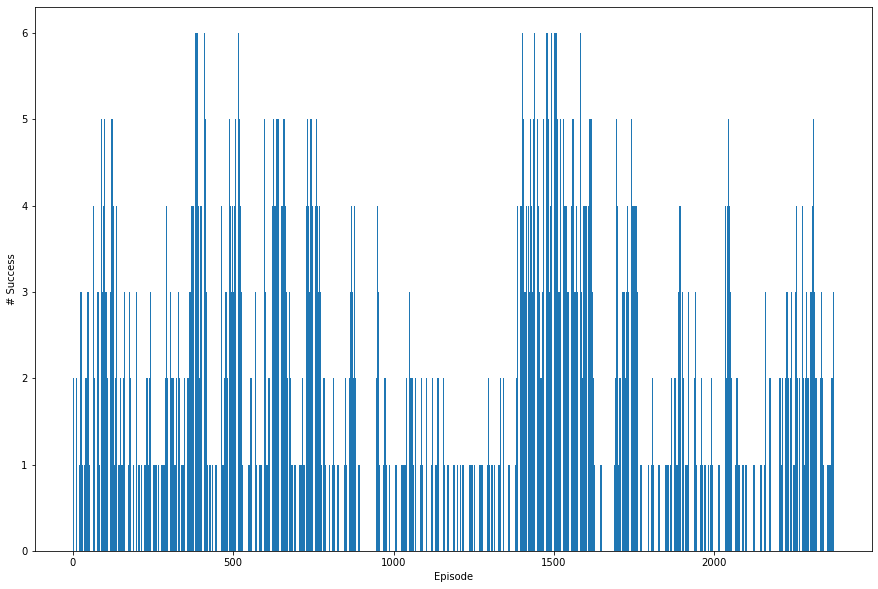

In [22]:
plt.figure(figsize=(15, 10))
plt.ylabel("# Success")
plt.xlabel("Episode")
plt.bar(list(range(len(success))), success)

In [ ]:
ans_noop = 0
ans_pos = 0
ans_neg = 0

for value in system.ans_record:
    if value == 0:
        ans_noop += 1
    elif value == 1:
        ans_pos += 1
    elif value == -1:
        ans_neg += 1
    else:
        print("ERROR")

In [ ]:
ans_noop

In [ ]:
ans_pos

In [ ]:
ans_neg

In [ ]:
success = 0
noop_success = 0
pos_success = 0
neg_success = 0

for true, pred in zip(system.ans_record, system.action_record):
    if true == 0:
        if true == pred:
            noop_success += 1
            success += 1
            
    elif true == 1:
        if true == pred:
            pos_success += 1
            success += 1
            
    else:
        if true == pred:
            neg_success += 1
            success += 1

In [ ]:
success / len(system.action_record)

In [ ]:
noop_success / ans_noop

In [ ]:
pos_success / ans_pos

In [ ]:
neg_success / ans_neg

In [7]:
a = np.array([1, 0, 1])

In [8]:
a

array([1, 0, 1])

In [10]:
(a>0).sum()

2